## Health Care for All Case Study using Pandas

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Pipeline Controller

In [ ]:
hk_df=load_original_data() 
hk_df=lower_case_column_names(hk_df)
hk_df=rename_columns(hk_df)
hk_df=drop_columns(hk_df)


In [33]:
hk_df=load_original_data() 

hk_df= (hk_df.pipe(lower_case_column_names)
 .pipe(rename_columns)
 #.pipe(drop_columns)
 ## extract month 
 ## binning the medina home income 
 ## 
)
  

,id,state,gender,median_home_val,median_household_income,avg_fam_income,hvp1,per_capita_income,pobc1,pobc2,med_fam_income,avg_household_income,avggift,tcode,dob,domain,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,41537,FL,F,742,396,470.0,0,15356,7,37,424.0,450,14.285714,2,6101,S2,50.0
1002,4881,FL,M,599,100,423.0,4,11670,10,27,406.0,200,9.230769,28,7401,C1,10.0
1003,66358,ND,M,593,258,299.0,0,10186,1,70,298.0,274,5.266667,1,3301,S2,5.0
1004,2231,WI,male,564,217,397.0,0,12315,0,96,386.0,295,11.400000,1,7301,T2,14.0


### Loading Data

In [23]:
def load_original_data():
    file1 = pd.read_csv('Data/file1.csv')
    file2 = pd.read_csv('Data/file2.txt', sep = '\t')
    file3 = pd.read_excel('Data/file3.xlsx')
    file4 = pd.read_excel('Data/file4.xlsx')
    return pd.concat([file1,file2,file3, file4], axis=0)

In [ ]:
hk_df=load_original_data()

### Make the column names lower case

#### Excercise:



Can you figure out how to use list comprehension and string methods in order to have all the column names in lowercase in the data frame?

In [24]:
def lower_case_column_names(hk_df):
    hk_df.columns=[i.lower() for i in hk_df.columns]
    return hk_df

In [ ]:
lower_case_column_names(hk_df)

#### Renaming columns

Columns names can be replaced in several ways. 

One of them is to provide a new **list of column names** and replace the value of `df.columns`

Another is to use the method `.rename()` which can be applied to a dataframe. This method needs as an input a **dictionary** in which the old column names are the keys, while the new column names are the values.



#### Excercise:

Can you rename the columns with the names from the variables_description file

In [25]:
def rename_columns(hk_df):
    hk_df.rename(columns={'controln':'id','hv1':'median_home_val', 'ic1':'median_household_income',"ic2":"med_fam_income", "ic3":"avg_household_income","ic4": "avg_fam_income","ic5":"per_capita_income"}, inplace=True )
    return hk_df

In [ ]:
rename_columns(hk_df)

hk_df1
hk_df2= hk_df1.clean
...
hk_df50

#### Deleting columns

In [27]:
def drop_columns(hk_df) :
    hk_df.drop(columns=["id","tcode",'pobc1',"dob"], inplace=True)
    return hk_df

In [ ]:
drop_columns(hk_df)

In [ ]:
hk_df

In [ ]:
def clean_gender(hk_df):
    ## do your magic about gender cleanfing 
    hk_df["gender"]
    return hk_df
 

In [ ]:
##. extracting month of the date column 
def 

#### Rearanging columns

In [ ]:
list(hk_df.columns)

Reordering columns is as simple as replace the dataframe with the new ordering of the columns.

In [ ]:
hk_df = hk_df[[
 'state',
 "gender",
 'median_home_val',
 'avg_fam_income',
 'avg_household_income',
 'med_fam_income',
 'median_household_income',
 'hvp1',
 "per_capita_income",
 'pobc2',
 'avggift',
 'domain',
 'target_d']]

hk_df.head()

#### Indexing & subsetting

Let's see one example of a filter:

select people who have "M" as their gender

In [ ]:
hk_df.gender.unique()


In [ ]:
hk_df.gender.describe()

We can use several filters but each condition or filter should be placed within parentheses.

Select people who have either "M" or "F" as their gender

& -> and
| -> or

In [ ]:
hk_df[(hk_df['gender'] == "M") | (hk_df['gender'] == "F")] # & -> and, | -> or

In [ ]:
hk_df[(hk_df['gender'] == "M") | (hk_df['gender'] == "F")]
#hk_df[np.where(hk_df['gender'].isin(["M","F"])) == True]

Another example:

Select people who have for which 'target_d' > 15:

In [ ]:
hk_df[hk_df['target_d'] > 15]

Select people from Florida ("FL")

In [ ]:
hk_df[hk_df['state'] == "FL"].head(10)

How many people from each gender in Florida?

In [ ]:
hk_df[(hk_df['gender'] == "M") & (hk_df['state'] == "FL") ].shape[0]

In [ ]:
hk_df[(hk_df['gender'].isin(["M","F"]) == True) & (hk_df['state'] == "FL") ].shape

We can get how many possible values we have for one particular column using the method `.value_counts()`. This method returns a pandas **Series**

In [ ]:
hk_df[hk_df['state'] == "FL"]

In [ ]:
type(hk_df[hk_df['state'] == "FL"])

In [ ]:
hk_df[hk_df['state'] == "FL"]['gender']

In [ ]:
type(hk_df[hk_df['state'] == "FL"]['gender'])

In [ ]:
hk_df[hk_df['state'] == "FL"]['gender'].value_counts(dropna=False)

In [ ]:
hk_df[hk_df['state'] == "FL"]['gender'].unique()

In [ ]:
hk_df['gender'].value_counts(dropna=True)

In [ ]:
type(hk_df['gender'].value_counts())

In [ ]:
hk_df['gender'].value_counts()['Female']

In [ ]:
hk_df['gender'].value_counts().sum()

The method `.value_counts()` doesn't show the missing values. If we want to know if there are any, we can provide the option `dropna=False`.

In [ ]:
hk_df['gender'].value_counts(dropna=False).sum()

In [ ]:
hk_df['gender'].value_counts(dropna=False)

We can know what are the unique values of a column using the method `.unique()`, and then the method `.tolist()` to castthe resulting **Series** into a list.

In [ ]:
hk_df["gender"].unique().tolist()

In [ ]:
hk_df.shape

The method `.info()` allow us to obtain information about every column in the dataframe

In [ ]:
hk_df.info()

The method `.describe()` give us a **dataframe** with an statistical summary of every column

In [ ]:
temp = hk_df.describe().transpose()
temp

#### Indexing

Select rows 5 and 6:

In [ ]:
hk_df.iloc[5:7]

In [ ]:
hk_df.iloc[[5,7],[0,2]]

In [ ]:
hk_df.head()

Select columns "gender" and "medina_home_value", and rows 4 to 10:

In [ ]:
hk_df.gender

In [ ]:
hk_df.gender.unique()

In [ ]:
hk_df.iloc[4:10,[2,1]]

In [ ]:
hk_df.iloc[4:10,:]

In [ ]:
hk_df.iloc[:,4:10]

#### Correcting data types

With `to_numeric` 

In [ ]:
hk_df.dtypes

In [ ]:
hk_df['median_home_val'] =  pd.to_numeric(hk_df['median_home_val'], errors='coerce')
hk_df['median_household_income'] =  pd.to_numeric(hk_df['median_household_income'], errors='coerce')
hk_df['per_capita_income'] =  pd.to_numeric(hk_df['per_capita_income'], errors='coerce')

In [ ]:
hk_df['avggift'] = hk_df['avggift'].astype('int')

In [ ]:
hk_df.dtypes

In [ ]:
hk_df.select_dtypes('object')

In [ ]:
hk_df.select_dtypes('float64')

In [ ]:
hk_df._get_numeric_data()

#### Removing duplicates

We can remove duplicate rows with the method `drop_duplicates()`

In [ ]:
hk_df.drop_duplicates()

In [ ]:
#hk_df.gender.drop_duplicates()

- Dropping columns with more null values
- Replacing / imputing null values
- Removing outliers

In [ ]:
# hk_df.isna().sum()
# hk_df.isna().sum()/len(hk_df)
round(hk_df.isna().sum()/len(hk_df),4)*100  # shows the percentage of null values in a column

<b> dropping columns with more null values -- analyst decides the threshold value

note: that the threshold values are usually higher percentages, for eg if 70% or more values in a column are missing, then its a good idea to drop those columns 


In [ ]:
nulls_df = pd.DataFrame(round(hk_df.isna().sum()/len(hk_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

In [ ]:
columns_drop = nulls_df[nulls_df['percent_nulls']>3]['header_name']  # dummy case with 3 
print(columns_drop.values)

### Replacing / imputing null values

Numerical columns: Some ways to approach the problem

- Ignore these observations
-Replace with general average
-Replace with similar type of averages
-Build model to predict missing values

if you have sufficient hk_df and losing a few rows of hk_df is not too bad, you can filter those
rows out as well

In [ ]:
hk_df[hk_df['gender'].isna()==True] # checking rows that are null based on a specific column 

In [ ]:
hk_df = hk_df[hk_df['med_fam_income'].isna()==False] # Since these nulls are not a lot, we can filter them 
hk_df = hk_df[hk_df['avg_fam_income'].isna()==False]
hk_df = hk_df[hk_df['per_capita_income'].isna()==False]

In [ ]:
mean_median_home_value = np.mean(hk_df['median_home_val'])
hk_df['median_home_val'] = hk_df['median_home_val'].fillna(mean_median_home_value)

Replacing null values for categorical variables 

General Approaches:
    
- Ignore observation
- Replace by most frequent value
- Replace using an algorithm like KNN using the neighbours.
- Predict the observation using a multiclass predictor
- Treat missing data as just another category



In [ ]:
hk_df['gender'].value_counts()

In [ ]:
len(hk_df[hk_df['gender'].isna()==True])  # number of missing values

In [ ]:
hk_df['gender'] = hk_df['gender'].fillna('F')

In [ ]:
hk_df['gender'].unique() # check the unique values in the column

Cleaning column gender using map function and another user defined function

In [ ]:
def clean_gender(x):
    if x in ['M', 'MALE']:
        return 'Male'
    elif x.startswith('F'):
        return 'Female'
    else:
        return 'U'

In [ ]:
hk_df['gender'] = list(map(clean_gender, hk_df['gender'])) 

In [ ]:
hk_df.gender.unique()

### Removing outliers 
This is done using a box plot which we will cover later. After identifying the upper limit and the lower limit values for a numerical column, we can use filters to remove those rows from the dataframe

### Creating buckets / groups of data 

In [ ]:
pd.cut(hk_df['med_fam_income'],4) # to check the bins

In [ ]:
med_fam_income_labels = ['Low', 'Moderate', 'High', 'Very High']
##hk_df['med_fam_income_binned'] = pd.cut(hk_df['med_fam_income'],4, labels=med_fam_income_labels)


In [ ]:
hk_df

Exercise:<br>
<b>For cities create a user defined function and use it with map() to divide the cities into 5 zones - East, west, north, south, and central

#### Summary functions

sum(), mean(), max()...

In [ ]:
hk_df.median_household_income.min()

In [ ]:
hk_df["median_home_val"].sum()

In [ ]:
np.sum(hk_df["median_home_val"])

## EDA and Plotting

In [ ]:
hk_df

In [ ]:
hk_df.columns

In [ ]:
plt.scatter(x=hk_df['med_fam_income'], y=hk_df['avg_household_income'])
plt.show()

In [ ]:
sns.pairplot(hk_df)

In [ ]:
hk_df.hist(figsize=(12,12))

In [ ]:
sns.distplot((hk_df['median_home_val']), bins=20)

In [ ]:
hk_df

<b>Power Transformer

In [21]:
pt = PowerTransformer()
med_home_val_transformed=pt.fit_transform(hk_df['median_home_val'].to_numpy().reshape(-1,1))
sns.displot(median_transformed)

NameError: name 'hk_df' is not defined

In [ ]:
##crud
hk_df["med_home_val_transformed"]= med_home_val_transformed
hk_df.drop(["median_home_val"],axis=1,inplace=True)

In [ ]:
hk_df

In [ ]:
corr = hk_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Highly Correlated Columns

In [ ]:
corr_matrix=hk_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

In [ ]:
def drop_high_correlated_columns(hk_df, threshold):
    corr_matrix=hk_df.corr().abs()
    upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

### dropping highly correlated features

In [ ]:
hk_df.drop(["per_capita_income","hvp1","avg_household_income","median_household_income","med_fam_income"],axis=1,inplace=True)

In [ ]:
hk_df

In [ ]:
hk_df.corr()

## Hot coding Categorical Variables 

In [ ]:
categoricals_features= hk_df.select_dtypes("object")
categoricals_features

In [ ]:
hk_df.state.value_counts()
hk_df.gender.value_counts()
hk_df.domain.value_counts()

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["gender"], drop_first=True)

In [ ]:
categorical_cols

### Predictive Modeling

<b> X Y split

In [34]:
hk_df

,id,state,gender,median_home_val,median_household_income,avg_fam_income,hvp1,per_capita_income,pobc1,pobc2,med_fam_income,avg_household_income,avggift,tcode,dob,domain,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,41537,FL,F,742,396,470.0,0,15356,7,37,424.0,450,14.285714,2,6101,S2,50.0
1002,4881,FL,M,599,100,423.0,4,11670,10,27,406.0,200,9.230769,28,7401,C1,10.0
1003,66358,ND,M,593,258,299.0,0,10186,1,70,298.0,274,5.266667,1,3301,S2,5.0
1004,2231,WI,male,564,217,397.0,0,12315,0,96,386.0,295,11.400000,1,7301,T2,14.0


In [41]:
hk_df.drop(["dob","tcode"],axis=1,inplace=True)
X=hk_df.drop('target_d', axis=1)
y=hk_df.target_d

In [62]:
hk_df.drop(["hvp1","pobc1","pobc2"],axis=1,inplace=True)

In [65]:
y=hk_df.target_d

In [66]:
X=hk_df._get_numeric_data()
X=X.drop('target_d', axis=1)

In [ ]:
#X=X.append(categorical_cols, ignore_index=True)

array([[<AxesSubplot:title={'center':'median_household_income'}>,
        <AxesSubplot:title={'center':'avg_fam_income'}>,
        <AxesSubplot:title={'center':'hvp1'}>],
       [<AxesSubplot:title={'center':'pobc1'}>,
        <AxesSubplot:title={'center':'pobc2'}>,
        <AxesSubplot:title={'center':'med_fam_income'}>],
       [<AxesSubplot:title={'center':'avg_household_income'}>,
        <AxesSubplot:title={'center':'avggift'}>, <AxesSubplot:>]],
      dtype=object)

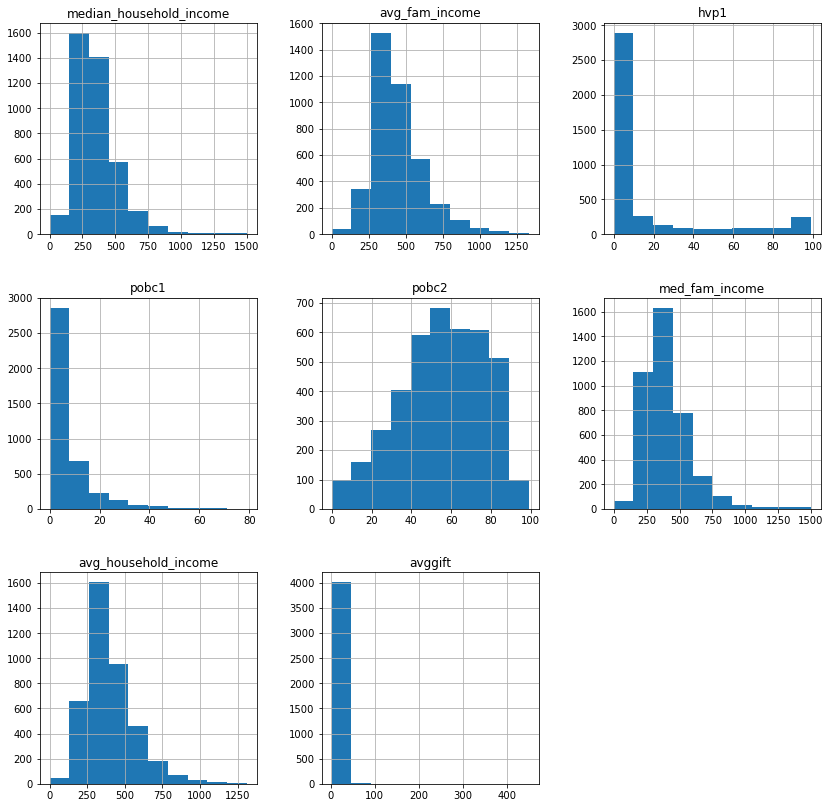

In [43]:
X.hist(figsize=(14,14))

<b>Data Splitting

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [70]:
X_train

,median_household_income,avg_fam_income,med_fam_income,avg_household_income,avggift
912,335,357.0,324.0,358,6.363636
799,387,494.0,446.0,442,14.777778
871,333,360.0,341.0,344,25.000000
486,139,156.0,130.0,169,15.833333
203,244,409.0,384.0,311,9.666667
...,...,...,...,...,...
115,560,718.0,684.0,635,7.617021
339,289,388.0,327.0,340,11.666667
432,182,235.0,206.0,219,13.000000
415,601,648.0,611.0,639,3.333333


In [71]:
y_train

912    10.0
799    25.0
871    20.0
486    30.0
203    10.0
       ... 
115    10.0
339    25.0
432    15.0
415     4.0
560    25.0
Name: target_d, Length: 2819, dtype: float64

In [72]:
X_test

,median_household_income,avg_fam_income,med_fam_income,avg_household_income,avggift
114,301,395.0,314.0,372,15.333333
605,334,405.0,370.0,391,3.655172
146,237,291.0,262.0,263,5.333333
172,419,497.0,426.0,486,25.000000
198,260,353.0,321.0,300,5.279070
...,...,...,...,...,...
110,291,331.0,302.0,317,17.538462
408,0,0.0,0.0,0,17.500000
336,661,741.0,697.0,700,9.000000
755,359,375.0,365.0,372,3.589286


<b> Standardize 

In [53]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [54]:
X_test_scaled=std_scaler.transform(X_test)

In [55]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.10507186 -0.49994947 -0.54705367 ... -0.42474848 -0.25744214
  -0.4824349 ]
 [ 0.19791375  0.27225276 -0.34022101 ...  0.23837082  0.24482998
   0.27597823]
 [-0.11672515 -0.48303993 -0.54705367 ... -0.33234661 -0.34115416
   1.19736369]
 ...
 [-0.99654874 -1.18760402 -0.54705367 ... -1.06612616 -1.08858292
   0.11573728]
 [ 1.44481605  1.14027571 -0.47810945 ...  1.1352125   1.4227777
  -0.75557289]
 [ 2.56935878  2.55504039  0.62499806 ...  2.39622626  2.58278712
   0.18333893]]
--------
[[-0.30317783 -0.28576199  1.34891236 ... -0.47910252 -0.17373012
   0.32605353]
 [-0.1108985  -0.22939686 -0.02997203 ... -0.17471989 -0.06012095
  -0.72656375]
 [-0.67608319 -0.87195931 -0.47810945 ... -0.76174353 -0.825488
  -0.57530182]
 ...
 [ 1.79441483  1.66447139  0.00450008 ...  1.60265726  1.78752293
  -0.24480486]
 [ 0.03476765 -0.39849224 -0.54705367 ... -0.20189691 -0.17373012
  -0.73250248]
 [ 0.06390089  0.43571163  2.69332464 ...  0.15140436  0.48400718
  -0.31240651]]


In [ ]:
hk_df

## Apply Linear Regression

In [ ]:
X.columns

### Modeling using Statsmodels

In [ ]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

In [ ]:
predictions_test

In [ ]:
#display adjusted R-squared
print(model.rsquared_adj)

### Modeling using Scikit Learn

Model fitting

In [73]:
model=LinearRegression()    # model
model.fit(X_train,y_train)   # model train

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<b> model parameters

In [59]:
model.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
model.intercept_

In [ ]:
model.score(X_test_scaled,y_test)

Making prediction

In [ ]:
y_pred=model.predict(X_test_scaled)   # model prediction
##y_pred_train=model.predict(X_train)

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<b>more fancy using seaborn

In [ ]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

<b> Error metrics

In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
R2=r2_score(y_test,y_pred)
R2

In [ ]:
X_test.shape[1]

In [ ]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

#### Feature Importance

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [ ]:
features_importances

In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Write a csv

With `to_csv` 

In [ ]:
hk_df.to_csv("Data/healthcare_for_all_cleaned_data.csv")